In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import io

import imghdr
import os

print(tf.__version__)

2.2.0-rc2


In [2]:
tf.executing_eagerly()

True

# Using Drive Mounting Instead (Tutorial: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

To mount Google Drive:
- Run the code below
- Click the URL 
- Sign in & click Allow to get the authorization code
- Copy the authorization code and paste it to:
  Enter your authorization code: 
  ____________

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


After mounting, Collab will be connected to your Google Drive
Click the File button on the left <-, click 'drive' then 'My Drive', what we need is:
- sample_labels.csv file and the ct_scan_img.zip
- If it is not there, you can copy it from the Bangkit Group Project Folder
- Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip"

Getting the sample_labels.csv in Colab:
- Find the sample_labels.csv file in your drive folder, right-click, and click COPY PATH
- Change the path variable below with the path you copied

In [0]:
path = "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/sample_labels.csv"
sample_labels_all = pd.read_csv(path)

In [6]:
sample_labels_all.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


We want each label to have 1 finding, therefore for those with multiple findings, we are picking one out of them according to our defined ranking.

In [0]:
ranking = ["pleural_thickening", "effusion", "consolidation", "hernia", "pneumonia", "fibrosis", 
           "edema", "emphysema", "cardiomegaly", "pneumothorax", "mass", "nodule", 
           "atelectasis", "infiltration", "no finding"]

In [0]:
def pick_one(label):
  splitted = label.split('|')
  print(splitted)
  lowered = [s.lower() for s in splitted]
  print(lowered)
  index_rank = [ranking.index(word) for word in lowered]
  print(index_rank)
  min_rank = min(index_rank)
  print(min_rank)
  picked = ranking[min_rank]
  return picked

In [10]:
result = pick_one('Emphysema|Infiltration|Pleural_Thickening|Pneumothorax')
result

['Emphysema', 'Infiltration', 'Pleural_Thickening', 'Pneumothorax']
['emphysema', 'infiltration', 'pleural_thickening', 'pneumothorax']
[7, 13, 0, 9]
0


'pleural_thickening'

In [11]:
init_labels = sample_labels_all['Finding Labels'].tolist()
print(len(init_labels))
print(init_labels[:5])

5606
['Emphysema|Infiltration|Pleural_Thickening|Pneumothorax', 'Cardiomegaly|Emphysema', 'No Finding', 'Atelectasis', 'Cardiomegaly|Edema|Effusion']


In [12]:
picked_labels = [pick_one(label) for label in init_labels]

Streaming output truncated to the last 5000 lines.
['no finding']
[14]
14
['Edema', 'Effusion', 'Nodule']
['edema', 'effusion', 'nodule']
[6, 1, 11]
1
['No Finding']
['no finding']
[14]
14
['No Finding']
['no finding']
[14]
14
['Infiltration']
['infiltration']
[13]
13
['No Finding']
['no finding']
[14]
14
['No Finding']
['no finding']
[14]
14
['Atelectasis']
['atelectasis']
[12]
12
['No Finding']
['no finding']
[14]
14
['Infiltration']
['infiltration']
[13]
13
['No Finding']
['no finding']
[14]
14
['No Finding']
['no finding']
[14]
14
['No Finding']
['no finding']
[14]
14
['No Finding']
['no finding']
[14]
14
['No Finding']
['no finding']
[14]
14
['Infiltration']
['infiltration']
[13]
13
['No Finding']
['no finding']
[14]
14
['No Finding']
['no finding']
[14]
14
['No Finding']
['no finding']
[14]
14
['Atelectasis']
['atelectasis']
[12]
12
['Infiltration']
['infiltration']
[13]
13
['Pleural_Thickening']
['pleural_thickening']
[0]
0
['No Finding']
['no finding']
[14]
14
['No Finding']
['

In [13]:
picked_labels[:10]

['pleural_thickening',
 'emphysema',
 'no finding',
 'atelectasis',
 'effusion',
 'consolidation',
 'no finding',
 'no finding',
 'effusion',
 'no finding']

In [0]:
sample_labels_all['Old Labels'] = sample_labels_all['Finding Labels']
sample_labels_all['Finding Labels'] = picked_labels 

In [15]:
sample_labels_all.groupby('Finding Labels').count()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Old Labels
Finding Labels,,,,,,,,,,,
atelectasis,249,249,249,249,249,249,249,249,249,249,249
cardiomegaly,66,66,66,66,66,66,66,66,66,66,66
consolidation,156,156,156,156,156,156,156,156,156,156,156
edema,76,76,76,76,76,76,76,76,76,76,76
effusion,606,606,606,606,606,606,606,606,606,606,606
emphysema,89,89,89,89,89,89,89,89,89,89,89
fibrosis,60,60,60,60,60,60,60,60,60,60,60
hernia,11,11,11,11,11,11,11,11,11,11,11
infiltration,503,503,503,503,503,503,503,503,503,503,503


In [0]:
average_num = sample_labels_all.groupby('Finding Labels').count()[['Image Index']].reset_index()

In [17]:
average_num

,Finding Labels,Image Index
0,atelectasis,249
1,cardiomegaly,66
2,consolidation,156
3,edema,76
4,effusion,606
5,emphysema,89
6,fibrosis,60
7,hernia,11
8,infiltration,503
9,mass,152


In [18]:
average_is = np.mean(average_num['Image Index'].tolist())
average_is

373.73333333333335

In [19]:
stad = np.std(average_num['Image Index'].tolist())
stad

731.4618665536996

### Balancing the Data

In [20]:
count = sample_labels_all.groupby('Finding Labels').count()[['Image Index']].reset_index()
count

,Finding Labels,Image Index
0,atelectasis,249
1,cardiomegaly,66
2,consolidation,156
3,edema,76
4,effusion,606
5,emphysema,89
6,fibrosis,60
7,hernia,11
8,infiltration,503
9,mass,152


In [21]:
above_100 = count[count['Image Index'] > 100]
above_100

,Finding Labels,Image Index
0,atelectasis,249
2,consolidation,156
4,effusion,606
8,infiltration,503
9,mass,152
10,no finding,3044
11,nodule,202
12,pleural_thickening,176
14,pneumothorax,172


In [22]:
above_100_without_nofinding = above_100[above_100['Finding Labels'] != 'no finding']
above_100_without_nofinding

,Finding Labels,Image Index
0,atelectasis,249
2,consolidation,156
4,effusion,606
8,infiltration,503
9,mass,152
11,nodule,202
12,pleural_thickening,176
14,pneumothorax,172


In [23]:
below_100 = count[count['Image Index'] < 100]
below_100

,Finding Labels,Image Index
1,cardiomegaly,66
3,edema,76
5,emphysema,89
6,fibrosis,60
7,hernia,11
13,pneumonia,44


In [0]:
sample_labels = sample_labels_all[sample_labels_all['Finding Labels'] != 'cardiomegaly']
sample_labels = sample_labels[sample_labels['Finding Labels'] != 'edema']
sample_labels = sample_labels[sample_labels['Finding Labels'] != 'emphysema']
sample_labels = sample_labels[sample_labels['Finding Labels'] != 'fibrosis']
sample_labels = sample_labels[sample_labels['Finding Labels'] != 'hernia']
sample_labels = sample_labels[sample_labels['Finding Labels'] != 'pneumonia']

In [25]:
# TESTING WITH NO -> NO FINDINGS
print(len(sample_labels))
sample_labels = sample_labels[sample_labels['Finding Labels'] != 'no finding']
print(len(sample_labels))

5260
2216


In [26]:
# Add back SOME no findings
average_label_num = int(np.mean(above_100_without_nofinding['Image Index'].tolist()))
print(average_label_num)

277


In [0]:
sample_no_finding = sample_labels_all[sample_labels_all['Finding Labels'] == 'no finding'].sample(average_label_num, replace=False)

In [28]:
sample_no_finding

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Old Labels
133,00000751_000.png,no finding,0,751,057Y,F,PA,2434,2605,0.143000,0.143000,No Finding
92,00000531_001.png,no finding,1,531,051Y,M,PA,2992,2991,0.143000,0.143000,No Finding
2646,00013294_001.png,no finding,1,13294,049Y,M,PA,2742,2991,0.143000,0.143000,No Finding
2647,00013303_000.png,no finding,0,13303,034Y,F,PA,2048,2500,0.168000,0.168000,No Finding
3511,00017264_001.png,no finding,1,17264,018Y,F,PA,1986,2845,0.143000,0.143000,No Finding
...,...,...,...,...,...,...,...,...,...,...,...,...
5558,00030345_000.png,no finding,0,30345,036Y,M,PA,3056,2544,0.139000,0.139000,No Finding
836,00004374_000.png,no finding,0,4374,044Y,F,PA,2048,2500,0.171000,0.171000,No Finding
5174,00027642_002.png,no finding,2,27642,064Y,F,AP,3056,2544,0.139000,0.139000,No Finding
4598,00022962_000.png,no finding,0,22962,021Y,F,PA,2544,3056,0.139000,0.139000,No Finding


In [0]:
sample_labels_added = sample_labels.append(sample_no_finding)

In [30]:
print(len(sample_labels_added))
sample_labels_added.groupby('Finding Labels').count()

2493


,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Old Labels
Finding Labels,,,,,,,,,,,
atelectasis,249,249,249,249,249,249,249,249,249,249,249
consolidation,156,156,156,156,156,156,156,156,156,156,156
effusion,606,606,606,606,606,606,606,606,606,606,606
infiltration,503,503,503,503,503,503,503,503,503,503,503
mass,152,152,152,152,152,152,152,152,152,152,152
no finding,277,277,277,277,277,277,277,277,277,277,277
nodule,202,202,202,202,202,202,202,202,202,202,202
pleural_thickening,176,176,176,176,176,176,176,176,176,176,176
pneumothorax,172,172,172,172,172,172,172,172,172,172,172


In [0]:
# TRY LARGER VALUES
sample_labels = sample_labels_added.sample(2480, replace=False) #500 TRY ALL cannot 2493

In [32]:
sample_labels.groupby('Finding Labels').count()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Old Labels
Finding Labels,,,,,,,,,,,
atelectasis,244,244,244,244,244,244,244,244,244,244,244
consolidation,156,156,156,156,156,156,156,156,156,156,156
effusion,602,602,602,602,602,602,602,602,602,602,602
infiltration,502,502,502,502,502,502,502,502,502,502,502
mass,152,152,152,152,152,152,152,152,152,152,152
no finding,276,276,276,276,276,276,276,276,276,276,276
nodule,201,201,201,201,201,201,201,201,201,201,201
pleural_thickening,175,175,175,175,175,175,175,175,175,175,175
pneumothorax,172,172,172,172,172,172,172,172,172,172,172


In [33]:
labels = sample_labels['Finding Labels'].tolist()
len(labels)

2480

Getting the CT Scan Images to Colab:
- Find the ct_scan_img.zip file in your drive folder (in Colab)
- Right-click, then click COPY PATH
- Paste the change the path I have, which is: "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip" BELOW, with the one you have.
- And then run the !unzip to unzip the images

In [0]:
!unzip -uq "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip" #"/content/drive/My Drive/FIONA CT Scan/ct_scan_img.zip"

From the Sample Labels dataframe / table, we get the filename of the images, and make a list out of that called 'image_dir' list.

In [0]:
image_dir = sample_labels['Image Index'].tolist()

In [47]:
# Just checking, carry on~
sample_labels[sample_labels['Image Index'] == image_dir[0]]['Finding Labels']

3794    effusion
Name: Finding Labels, dtype: object

3794    effusion
Name: Finding Labels, dtype: object

In [48]:
type(image_dir[0])

str

str

In [49]:
image_dir[:5]

['00018629_000.png',
 '00026602_000.png',
 '00003296_002.png',
 '00008727_013.png',
 '00019766_001.png']

['00018629_000.png',
 '00026602_000.png',
 '00003296_002.png',
 '00008727_013.png',
 '00019766_001.png']

The RAM available in Google Colab is LIMITED, I believe initially it gives 15 GB.
If there is an error of: Colab doesn't have enough RAM, usually it asks if we want MORE RAM, click yes!
And it will give us 35 GB.

But, it still won't be enough for us to try with ALL of the images.
Therefore, we will only use 100 Images.

In [170]:
test_dir = image_dir 
len(test_dir)

2480

In [51]:
test_dir[:5]

['00018629_000.png',
 '00026602_000.png',
 '00003296_002.png',
 '00008727_013.png',
 '00019766_001.png']

['00018629_000.png',
 '00026602_000.png',
 '00003296_002.png',
 '00008727_013.png',
 '00019766_001.png']

Creating the Datasets:
The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

- Create a source dataset from your input data.
- Apply dataset transformations to preprocess the data.
- Iterate over the dataset and process the elements.

Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.

Sources can be from:
- LIST, using -> from_tensor_slices
- Files given filename, using -> list_files

In [0]:
dataset_from_list = tf.data.Dataset.list_files(test_dir)

In [53]:
dataset_from_list

<ShuffleDataset shapes: (), types: tf.string>

<ShuffleDataset shapes: (), types: tf.string>

In [54]:
for element in dataset_from_list:
  print(element)

tf.Tensor(b'./00012628_015.png', shape=(), dtype=string)
tf.Tensor(b'./00026810_013.png', shape=(), dtype=string)
tf.Tensor(b'./00009600_003.png', shape=(), dtype=string)
tf.Tensor(b'./00025169_005.png', shape=(), dtype=string)
tf.Tensor(b'./00020499_000.png', shape=(), dtype=string)
tf.Tensor(b'./00004832_004.png', shape=(), dtype=string)
tf.Tensor(b'./00001797_002.png', shape=(), dtype=string)
tf.Tensor(b'./00005532_024.png', shape=(), dtype=string)
tf.Tensor(b'./00016332_002.png', shape=(), dtype=string)
tf.Tensor(b'./00005876_000.png', shape=(), dtype=string)
tf.Tensor(b'./00004509_000.png', shape=(), dtype=string)
tf.Tensor(b'./00021857_002.png', shape=(), dtype=string)
tf.Tensor(b'./00025252_015.png', shape=(), dtype=string)
tf.Tensor(b'./00011328_005.png', shape=(), dtype=string)
tf.Tensor(b'./00018237_035.png', shape=(), dtype=string)
tf.Tensor(b'./00030079_032.png', shape=(), dtype=string)
tf.Tensor(b'./00021484_002.png', shape=(), dtype=string)
tf.Tensor(b'./00012704_015.png'

In [0]:
dataset_of_filenames = tf.data.Dataset.from_tensor_slices(test_dir) 

In [56]:
dataset_of_filenames

<TensorSliceDataset shapes: (), types: tf.string>

<TensorSliceDataset shapes: (), types: tf.string>

In [57]:
for element in dataset_of_filenames:
  print(element)

tf.Tensor(b'00018629_000.png', shape=(), dtype=string)
tf.Tensor(b'00026602_000.png', shape=(), dtype=string)
tf.Tensor(b'00003296_002.png', shape=(), dtype=string)
tf.Tensor(b'00008727_013.png', shape=(), dtype=string)
tf.Tensor(b'00019766_001.png', shape=(), dtype=string)
tf.Tensor(b'00028518_003.png', shape=(), dtype=string)
tf.Tensor(b'00003722_019.png', shape=(), dtype=string)
tf.Tensor(b'00028833_000.png', shape=(), dtype=string)
tf.Tensor(b'00011723_040.png', shape=(), dtype=string)
tf.Tensor(b'00001485_003.png', shape=(), dtype=string)
tf.Tensor(b'00010672_004.png', shape=(), dtype=string)
tf.Tensor(b'00023203_002.png', shape=(), dtype=string)
tf.Tensor(b'00022574_000.png', shape=(), dtype=string)
tf.Tensor(b'00023128_026.png', shape=(), dtype=string)
tf.Tensor(b'00019750_018.png', shape=(), dtype=string)
tf.Tensor(b'00005665_001.png', shape=(), dtype=string)
tf.Tensor(b'00021610_016.png', shape=(), dtype=string)
tf.Tensor(b'00010007_157.png', shape=(), dtype=string)
tf.Tensor(

As we can see, whether it is made using list_files or from_tensor_slices it outputs the same dataset. 

In [58]:
for f in dataset_of_filenames.take(1):
    print(f.numpy())
    print(f)
    print(type(f))
    filename_str = str(f.numpy())[2:-1]
    print(filename_str)
    print(type(filename_str))
    print(type(str(f.numpy())))
    print(image_dir[0])
    print(filename_str == image_dir[0])
    print(sample_labels[sample_labels['Image Index'] == filename_str].reset_index().iloc[0]['Finding Labels'])


b'00018629_000.png'
tf.Tensor(b'00018629_000.png', shape=(), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>
00018629_000.png
<class 'str'>
<class 'str'>
00018629_000.png
True
effusion
b'00018629_000.png'
tf.Tensor(b'00018629_000.png', shape=(), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>
00018629_000.png
<class 'str'>
<class 'str'>
00018629_000.png
True
effusion


In [0]:
def parse_data_without_augmentation(filename, IMAGE_SIZE): #, scores, IMAGE_SIZE):
    '''
    Loads the image file without any augmentation. Used for validation set.
    Args:
        filename: the filename from the record
        scores: the scores from the record
    Returns:
        an image referred to by the filename and its scores
    '''

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = (tf.cast(image, tf.float32) - 127.5) / 127.5

    return image #, label #, scores

In [60]:
IMG_WIDTH = 160
IMG_HEIGHT = 160
IMG_SIZE = 160
IMAGE_SIZE = 160
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 25 #1 #####32
#print("BATCH SIZE: "+str(BATCH_SIZE))
IMG_HEIGHT = 160 #224
IMG_WIDTH = 160 #224
IMG_SIZE = 160
image_count = len(test_dir)
print(image_count)
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
AUTOTUNE = tf.data.experimental.AUTOTUNE

2480
2480


To actually get the Image, we need to parse every bit of the image from the image file, using the function:
parse_data_without_augmentation on the Dataset of filename we have -> list_ds.

num_parallel_calls: (Optional.) If specified, the implementation creates a threadpool, which is used to fetch inputs from cycle elements asynchronously and in parallel. The default behavior is to fetch inputs from cycle elements synchronously with no parallelism. If the value tf.data.experimental.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.

In [0]:
image_dataset = dataset_of_filenames.map(lambda x: parse_data_without_augmentation(x, IMAGE_SIZE), num_parallel_calls=AUTOTUNE)

In [62]:
image_dataset

<ParallelMapDataset shapes: (160, 160, 3), types: tf.float32>

<ParallelMapDataset shapes: (160, 160, 3), types: tf.float32>

Some things we can do to Dataset object:
- Apply transformation
- Concatenate
- Enumerate (Create tuples of (index, element) with specified index starting point)
- Filter


Since we cannot index a TF Dataset object, we can turn the Dataset into List form using the code below

In [0]:
img_ds_list = list(image_dataset.as_numpy_iterator())

In [64]:
img_ds_list[0]

array([[[-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        ...,
        [-0.95960784, -0.95960784, -0.95960784],
        [-0.90956825, -0.90956825, -0.90956825],
        [-0.65419704, -0.65419704, -0.65419704]],

       [[-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        ...,
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.91529375, -0.91529375, -0.91529375],
        [-0.6596089 , -0.6596089 , -0.6596089 ]],

       [[-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        ...,
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.91529375, -0.91529375, -0.91529375],
        [-0.6756872 , -0.6756872 , -0.6756872 ]],

       ...,

       [[ 0.64470583,  0.64470583,  0.64470583],
        [ 0

array([[[-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        ...,
        [-0.95960784, -0.95960784, -0.95960784],
        [-0.90956825, -0.90956825, -0.90956825],
        [-0.65419704, -0.65419704, -0.65419704]],

       [[-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        ...,
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.91529375, -0.91529375, -0.91529375],
        [-0.6596089 , -0.6596089 , -0.6596089 ]],

       [[-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        ...,
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.91529375, -0.91529375, -0.91529375],
        [-0.6756872 , -0.6756872 , -0.6756872 ]],

       ...,

       [[ 0.64470583,  0.64470583,  0.64470583],
        [ 0

In [65]:
# The Images
for image in image_dataset:
  print(image)

Streaming output truncated to the last 5000 lines.
[[[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.9        -0.9        -0.9       ]
  [-0.907451   -0.907451   -0.907451  ]
  [-0.8901962  -0.8901962  -0.8901962 ]]

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.9203922  -0.9203922  -0.9203922 ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.   

Splitting Dataset into Training, Testing & Validation 

In [66]:
total = len(sample_labels)
print("Total Data To Use: "+str(total))

Total Data To Use: 2480
Total Data To Use: 2480


In [67]:
# Note that we only have 100 images
train_size = int(0.7*total) #70
test_size = int(0.15*total) #15
val_size = int(0.15*total) #15
print(train_size)
print(test_size)
print(val_size)

1736
372
372
1736
372
372


In [0]:
# Splitting Image Data
train_img = image_dataset.take(train_size)
test_img = image_dataset.skip(train_size)
val_img = test_img.skip(val_size)
test_img = test_img.take(test_size)

In [69]:
train_img

<TakeDataset shapes: (160, 160, 3), types: tf.float32>

<TakeDataset shapes: (160, 160, 3), types: tf.float32>

In [70]:
train_lab = labels[0:train_size]
print(len(train_lab))
test_lab = labels[train_size:(train_size+test_size)]
print(len(test_lab))
val_lab = labels[(train_size+test_size):]
print(len(val_lab))

1736
372
372
1736
372
372


In [71]:
for img in train_img:
  print(img)

Streaming output truncated to the last 5000 lines.
[[[-0.88768625 -0.88768625 -0.88768625]
  [-0.9244706  -0.9244706  -0.9244706 ]
  [-0.92941177 -0.92941177 -0.92941177]
  ...
  [-0.92156863 -0.92156863 -0.92156863]
  [-0.92156863 -0.92156863 -0.92156863]
  [-0.92156863 -0.92156863 -0.92156863]]

 [[-0.8933333  -0.8933333  -0.8933333 ]
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92941177 -0.92941177 -0.92941177]
  ...
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92156863 -0.92156863 -0.92156863]]

 [[-0.8960784  -0.8960784  -0.8960784 ]
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92941177 -0.92941177 -0.92941177]
  ...
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92156863 -0.92156863 -0.92156863]]

 ...

 [[-0.92156863 -0.92156863 -0.92156863]
  [-0.92156863 -0.92156863 -0.92156863]
  [-0.92156863 -0.92156863 -0.92156863]
  ...
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92156863 -0.92156863 -0.921

In [0]:
def show_batch(image_batch, num_elements): #, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(num_elements):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [0]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  #ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  #ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [0]:
BATCH_SIZE = train_size
print("Train size: "+str(BATCH_SIZE))
train_img_batch = prepare_for_training(train_img)
BATCH_SIZE = test_size
print("Test size: "+str(BATCH_SIZE))
test_img_batch = prepare_for_training(test_img)
BATCH_SIZE = val_size
print("Val size: "+str(BATCH_SIZE))
val_img_batch = prepare_for_training(val_img)

In [0]:
train_img_batch

In [0]:
train_batch = next(iter(train_img_batch))
test_batch = next(iter(test_img_batch))
val_batch = next(iter(val_img_batch))

In [0]:
print(train_batch.shape)
print(test_batch.shape)
print(val_batch.shape)

## Feature Extraction Using Pre-trained MobileNetV2 Model

Often, it is better to get features using a pre-trained embedding model that have been trained with millions of images, instead of training our own embedding. We will use MobileNetV2.

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [0]:
print(IMG_SIZE)

In [0]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Extracting features for train, test, and validation.

In [0]:
train_features = base_model(train_batch)
test_features = base_model(test_batch)
val_features = base_model(val_batch)

In [0]:
print(train_features.shape)
print(test_features.shape)
print(val_features.shape)

We need to convert the numpy version of these features, to Input Tensors, before inputting it to the model.

In [0]:
# fnp = features numpy
train_fnp = train_features.numpy()
test_fnp = test_features.numpy()
val_fnp = val_features.numpy()

In [0]:
train_input = tf.convert_to_tensor(train_fnp, dtype=tf.float32)
test_input = tf.convert_to_tensor(test_fnp, dtype=tf.float32)
val_input = tf.convert_to_tensor(val_fnp, dtype=tf.float32)

In [0]:
test_input.shape

Another Way:

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [0]:
train_batch_ave = global_average_layer(train_features)
print(train_batch_ave.shape)

In [0]:
test_batch_ave = global_average_layer(test_features)
print(test_batch_ave.shape)

In [0]:
val_batch_ave = global_average_layer(val_features)
print(val_batch_ave.shape)

In [0]:
prediction_layer = tf.keras.layers.Dense(256) #(2) #256

In [0]:
train_pred_batch = prediction_layer(train_batch_ave)
print(train_pred_batch.shape)

In [0]:
test_pred_batch = prediction_layer(test_batch_ave)
print(test_pred_batch.shape)

In [0]:
val_pred_batch = prediction_layer(val_batch_ave)
print(val_pred_batch.shape)

In [0]:
train_input = train_pred_batch.numpy()

In [0]:
train_input.shape

In [0]:
test_input = test_pred_batch.numpy()
test_input.shape

In [0]:
val_input = val_pred_batch.numpy()
val_input.shape

# Pre-processing the Labels:


Since the labels are texts, we need to create an embedding or number / vector representations from it. 

We will use:
- LabelEncoder -> assigning integer 0 to number of unique categorical variable to each categorical variable. 
- OneHotEncoding

In [0]:
num_of_labels = len(labels)
print(num_of_labels)

In [0]:
unique_labels = sample_labels['Finding Labels'].unique().tolist()
print(unique_labels[:5])
num_of_unique = len(unique_labels)
num_of_unique

In [0]:
labels[:5]

In [0]:
from sklearn import preprocessing

Creating the Label Encoder object from ALL of our Labels

In [0]:
le = preprocessing.LabelEncoder()

In [0]:
le.fit(labels)

Encode train, test, and validation labels with Integer Values.

In [0]:
train_label_value = le.transform(train_lab)
test_label_value = le.transform(test_lab)
val_label_value = le.transform(val_lab)

In [0]:
len(train_lab)

In [0]:
label_to_value = pd.DataFrame(data=train_lab[:10], columns=['Original Label'])
label_to_value['Label Value'] = train_label_value[:10]

In [0]:
all_labels_value = le.transform(labels)
len(all_labels_value)

Below is the Example of Encoding Validation Label to their label values. 

Notice that all 'No Finding' becomes the value 24

In [0]:
label_to_value

In [0]:
train_one_hot = tf.one_hot(train_label_value, num_of_unique, on_value=1, off_value=0)
test_one_hot = tf.one_hot(test_label_value, num_of_unique, on_value=1, off_value=0)
val_one_hot = tf.one_hot(val_label_value, num_of_unique, on_value=1, off_value=0)

In [0]:
all_labels_one_hot = tf.one_hot(all_labels_value, num_of_unique, on_value=1, off_value=0)

In [0]:
label_to_value['One Hot'] = train_one_hot[:10]

In [0]:
label_to_value

In [0]:
all_labels_df = pd.DataFrame(data=labels, columns=['Label'])
all_labels_df['Value'] = all_labels_value
all_labels_df['One Hot'] = all_labels_one_hot

In [0]:
all_labels_df

# Creating the CT Scan Image Classification Model

In [0]:
from tensorflow.keras.models import Sequential

Additional Metrics Functions on top of Accuracy

In [0]:
def recall_m(y_true, y_pred):
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))

Creating the Model TRIAL #1:

In [0]:
model_1 = keras.Sequential([
    keras.Input(shape=(256)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_of_unique, activation='softmax')
])

In [0]:
model_1.summary()

In [0]:
model_1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy', precision_m, recall_m, f1_m])

In [0]:
history = model_1.fit(train_input, train_one_hot, epochs=25, validation_data = (val_input, val_one_hot))

In [0]:
model_2 = keras.Sequential([
    keras.Input(shape=(256)),     
    keras.layers.Dense(500, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.45)),
    keras.layers.Dense(320, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.11)),     
    keras.layers.Dense(300,kernel_regularizer=tf.keras.regularizers.l2(0.07)),     
    keras.layers.Dropout(rate=0.001),
    keras.layers.Dense(180),    
    #keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07)),                 

    keras.layers.Dense(num_of_unique, activation='softmax')
])

model_2.summary()

model_2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy', precision_m, recall_m, f1_m])

#history = model_2.fit(train_input, train_one_hot, epochs=25, validation_data = (val_input, val_one_hot)) # epochs=300

In [0]:
# Using Early Stopping:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)

In [0]:
# Using Early Stopping:
callback_2 = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=20)

In [0]:
history = model_2.fit(train_input, train_one_hot, epochs=25, callbacks=[callback_2], validation_data = (val_input, val_one_hot)) # epochs=300

In [0]:
model_3 = keras.Sequential([
    keras.Input(shape=(256)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(rate=0.7),
    keras.layers.Dense(num_of_unique, activation='softmax'),
])

model_3.summary()
model_3.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy', precision_m, recall_m, f1_m])

In [0]:
history_3 = model_3.fit(train_input, train_one_hot, epochs=25, validation_data = (val_input, val_one_hot))

In [0]:
model_4 = keras.Sequential([
    keras.Input(shape=(256)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(rate=0.7),
    keras.layers.Dense(num_of_unique, activation='softmax'),
])

model_4.summary()
model_4.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy', precision_m, recall_m, f1_m])

In [0]:
history_4 = model_4.fit(train_input, train_one_hot, epochs=300, callbacks=[callback], validation_data = (val_input, val_one_hot))

In [0]:
model_5 = keras.Sequential([
    keras.Input(shape=(256)), 
    keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.25)),
    keras.layers.Dropout(rate=0.7),
    keras.layers.Dense(num_of_unique, activation='softmax'),
])

model_5.summary()
model_5.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy', precision_m, recall_m, f1_m])

In [0]:
history_5 = model_5.fit(train_input, train_one_hot, epochs=300, validation_data = (val_input, val_one_hot))

EVALUATION

In [0]:
def create_evaluation_table(model, x_input, actual_label):
  test_pred = model_1.predict(x_input)
  argmarx_ = [np.argmax(pred) for pred in test_pred]
  pred_labels = [all_labels_df[all_labels_df.Value == val].reset_index().iloc[0]['Label'] for val in argmarx_]
  compare = pd.DataFrame(data=actual_label, columns=['Actual'])
  compare['Predicted'] = pred_labels
  return compare

In [159]:
evaluation = model_1.evaluate(test_input, test_one_hot)

12/12 [==============================] - 0s 1ms/step - loss: 2.7794 - accuracy: 0.2446 - precision_m: 0.2373 - recall_m: 0.1344 - f1_m: 0.1707


In [160]:
evaluation_2 = model_2.evaluate(test_input, test_one_hot)

12/12 [==============================] - 0s 15ms/step - loss: 2.1374 - accuracy: 0.2258 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00


In [152]:
evaluation_3 = model_3.evaluate(test_input, test_one_hot)

12/12 [==============================] - 0s 1ms/step - loss: 2.0646 - accuracy: 0.2876 - precision_m: 0.4444 - recall_m: 0.0484 - f1_m: 0.0864        


In [153]:
evaluation_4 = model_4.evaluate(test_input, test_one_hot)

12/12 [==============================] - 0s 1ms/step - loss: 2.0321 - accuracy: 0.2688 - precision_m: 0.1667 - recall_m: 0.0068 - f1_m: 0.0130        


In [154]:
evaluation_5 = model_5.evaluate(test_input, test_one_hot)

12/12 [==============================] - 0s 1ms/step - loss: 2.1206 - accuracy: 0.2258 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00


According to Evaluation using Test Examples, model 3 performs well consistently.

In [0]:
model_3_table = create_evaluation_table(model_3, test_input, test_lab)

In [164]:
model_3_table[0:60]

,Actual,Predicted
0,consolidation,effusion
1,pneumothorax,pneumothorax
2,mass,effusion
3,pleural_thickening,pneumothorax
4,consolidation,effusion
5,mass,nodule
6,nodule,infiltration
7,atelectasis,effusion
8,effusion,pneumothorax
9,infiltration,effusion


In [165]:
model_3_table[50:100]

,Actual,Predicted
50,infiltration,pleural_thickening
51,effusion,infiltration
52,infiltration,no finding
53,infiltration,no finding
54,effusion,infiltration
55,no finding,pleural_thickening
56,pneumothorax,effusion
57,nodule,no finding
58,effusion,no finding
59,infiltration,effusion


{ ADDITIONAL } Evaluating using Validation Dataset 

In [0]:
val_eval = model_1.evaluate(val_input, val_one_hot)

In [0]:
val_eval_table = create_evaluation_table(model_1, val_input, val_lab)

In [0]:
val_eval_table

In [0]:
train_eval = model_1.evaluate(train_input, train_one_hot)

In [0]:
train_eval_table = create_evaluation_table(model_1, train_input, train_lab)

In [0]:
train_eval_table

Show CT Scan Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

ValueError: ignored

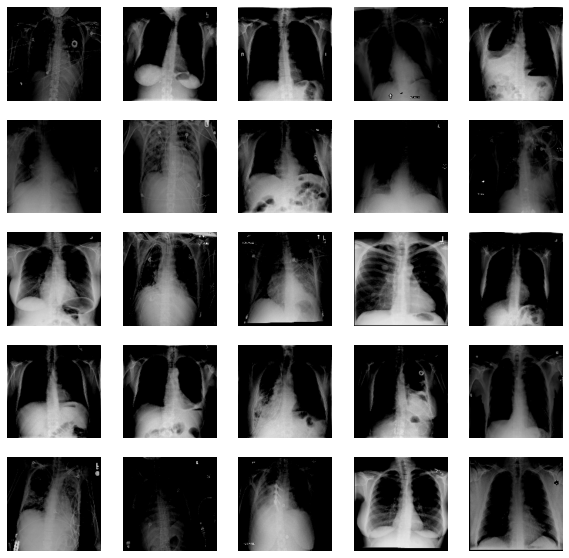

In [167]:
show_batch(val_batch.numpy(), val_size)